# Alucar - Analisando as vendas
Com o passar do tempo, empresa está vendendo mais ou menos?

In [98]:
import pandas as pd

In [99]:
alucar = pd.read_csv('alucar.csv')

In [100]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [101]:
print('Quantidade de dados nulos', alucar.isna().sum().sum())

Quantidade de dados nulos 0


In [102]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [103]:
#convertendo mês para datetime
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [104]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [105]:
#conferindo a versão
print(sns.__version__)

0.11.1


<AxesSubplot:xlabel='mes', ylabel='vendas'>

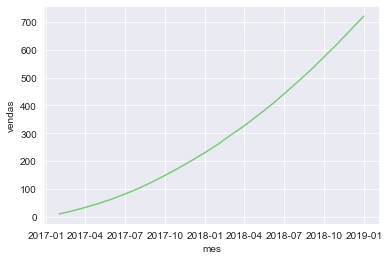

In [106]:
#plot simples das vendas ao longo do ano
sns.lineplot(x='mes', y='vendas', data=alucar)

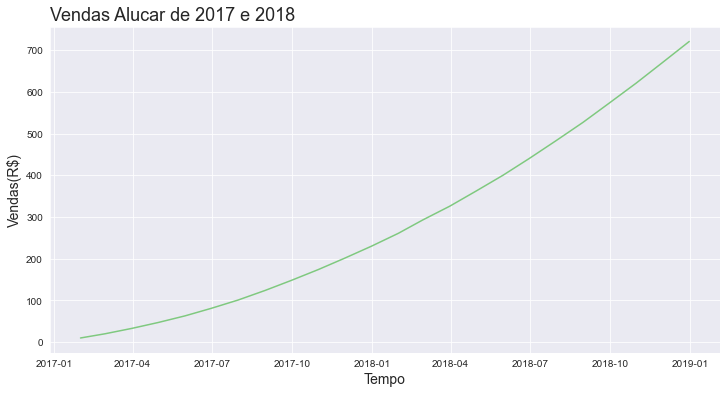

In [107]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas(R$)', fontsize=14)
ax = ax

### Decompondo as vendas

In [108]:
#subtraio as vendas de um mes com o mês anterior
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


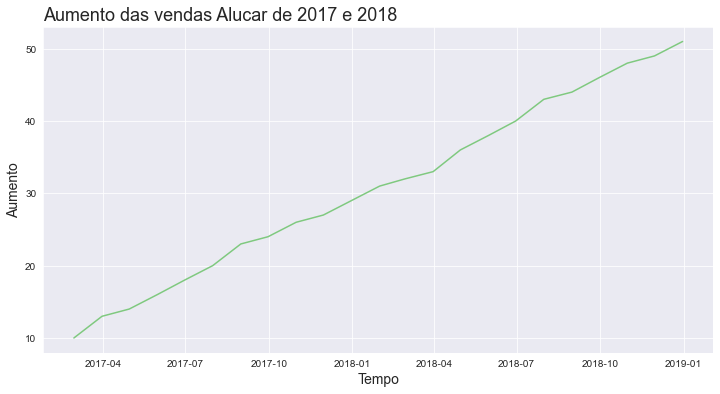

In [109]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [110]:
#criando função para plotagem do gráfico
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

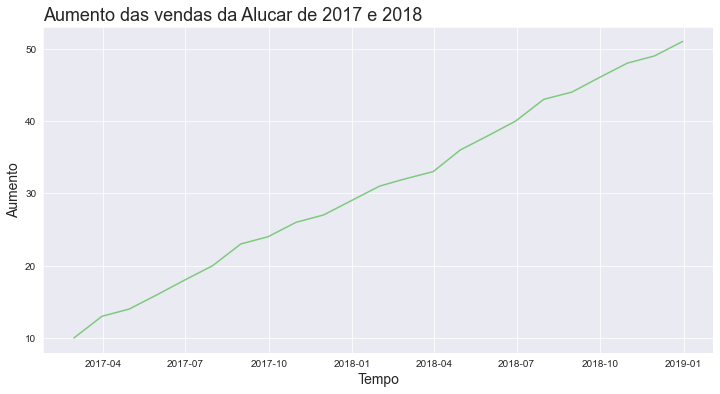

In [111]:
#Teste Plotagem
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
      'mes', 'aumento', alucar)

### Decompondo aceleração das vendas

In [112]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


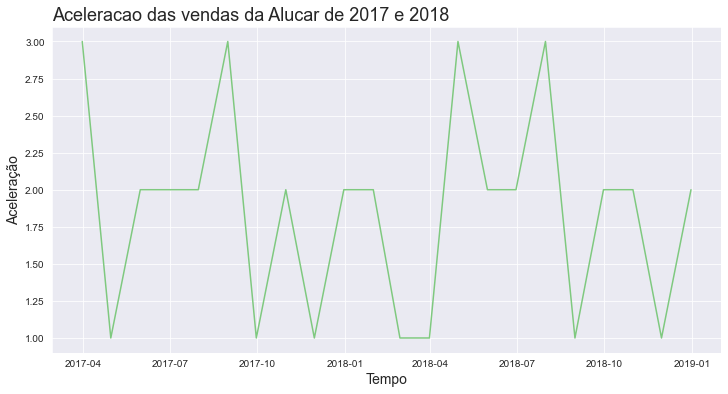

In [113]:
plotar('Aceleracao das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
      'mes', 'aceleracao', alucar)

### Observação de Têndencias - Juntando os Plots dos 3 gráficos

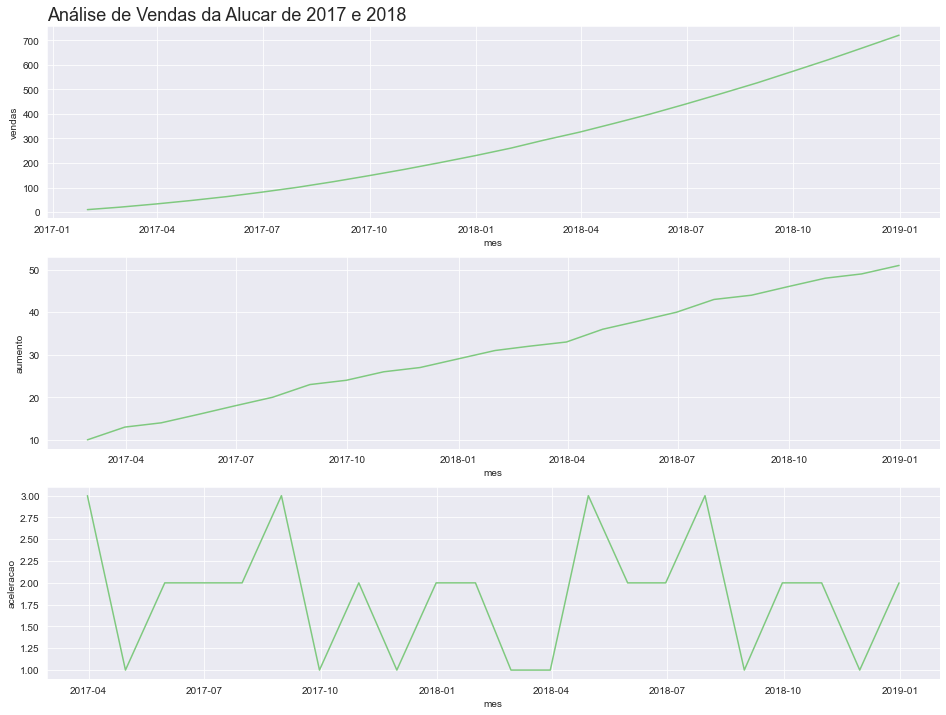

In [114]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3,1,1) #utlima ',' posição no gráfico
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [115]:
#criano função de plot comparação

def plot_comparacao(x,y1, y2, y3, dataset, title):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3,1,1) #utlima ',' posição no gráfico
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

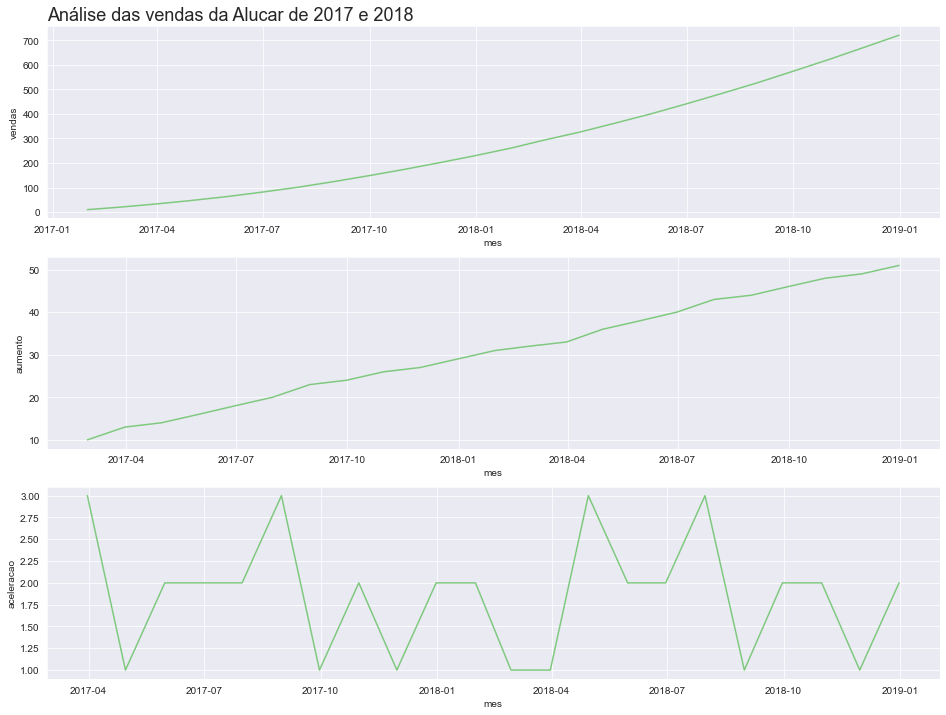

In [116]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas da Alucar de 2017 e 2018')

### Autocorrelação 
Medida de correlação entre as observações de uma série temporal\
Nível máximo de correlação = 1\
Nível de correlação = -1 (menor correlação possível)

In [117]:
from pandas.plotting import autocorrelation_plot

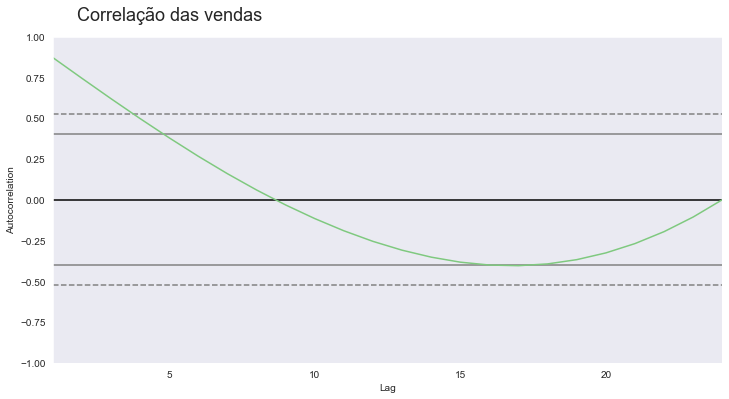

In [118]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

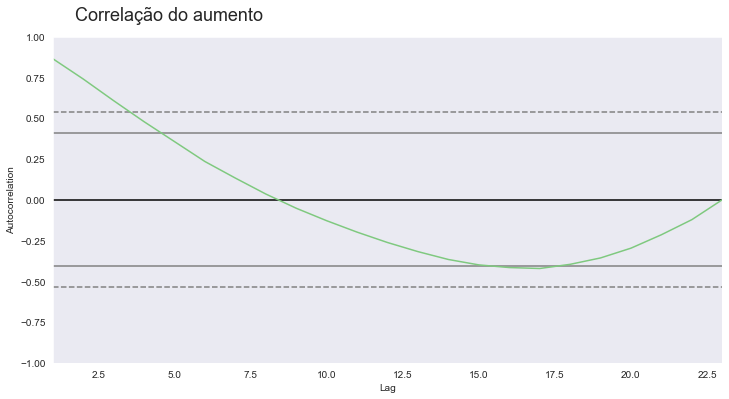

In [119]:
#precisamos passar o índice 1, pois o 0 de correlação é Nan
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

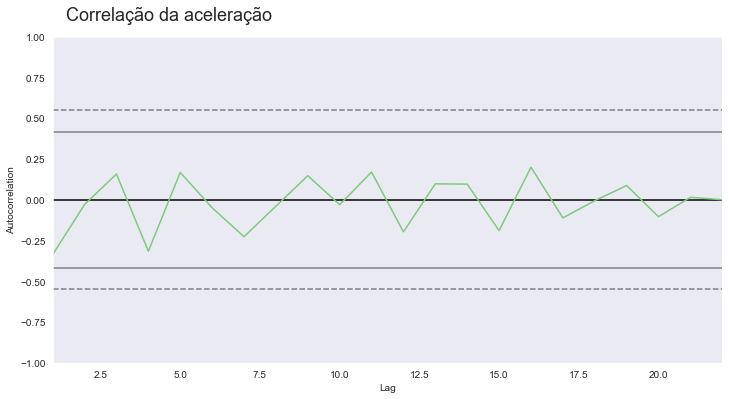

In [120]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

# Análise de assinantes da Newsletter

In [121]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [122]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [123]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [124]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [125]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


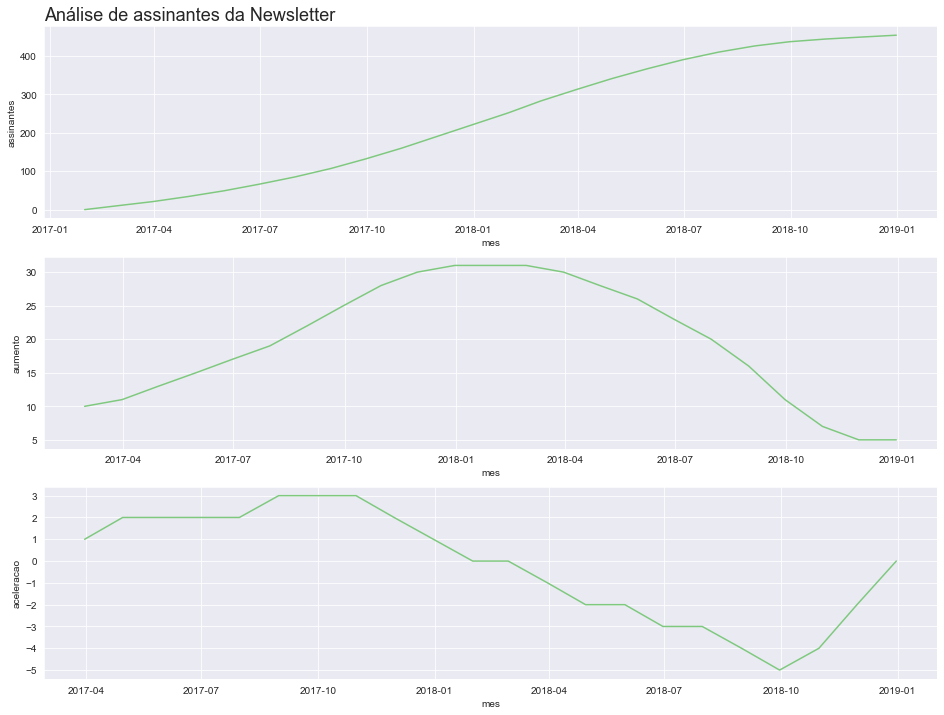

In [126]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newsletter')

# Análise de sazionalidade em empresa de chocolate

In [127]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [128]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [129]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [130]:
print('Quantidade de linhas: ' , chocolura.shape)
print('Quantidade de dados nulos: ' , chocolura.isna().sum().sum())

Quantidade de linhas:  (24, 2)
Quantidade de dados nulos:  0


In [131]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


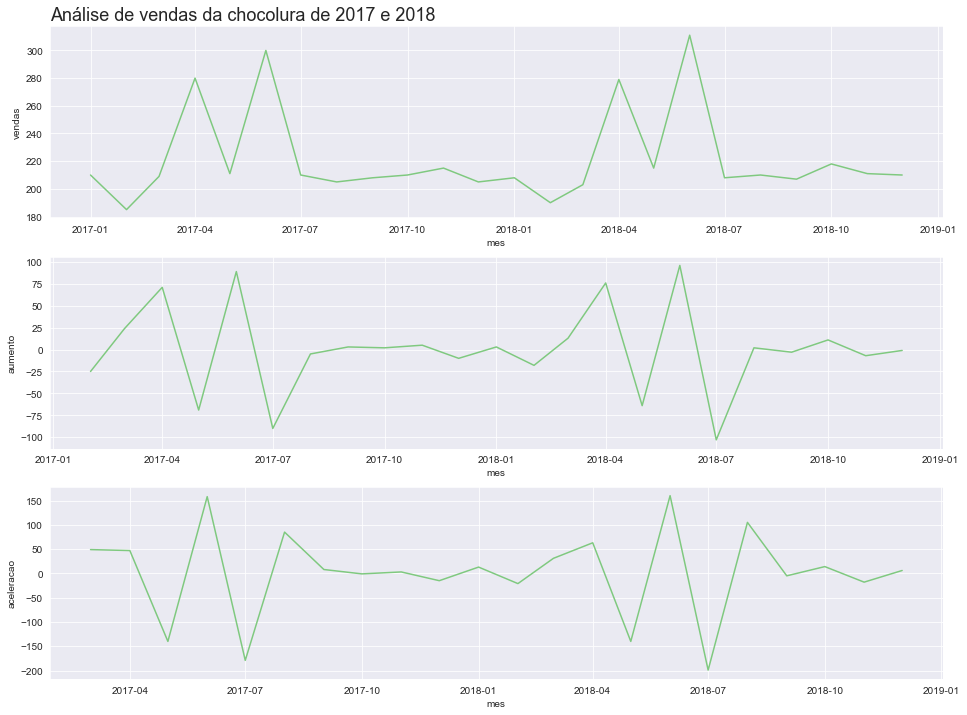

In [132]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da chocolura de 2017 e 2018')

### Vendas diárias (Outubro e Novembro)

In [133]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [134]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados Nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados Nulos:  0


In [135]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [136]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [137]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


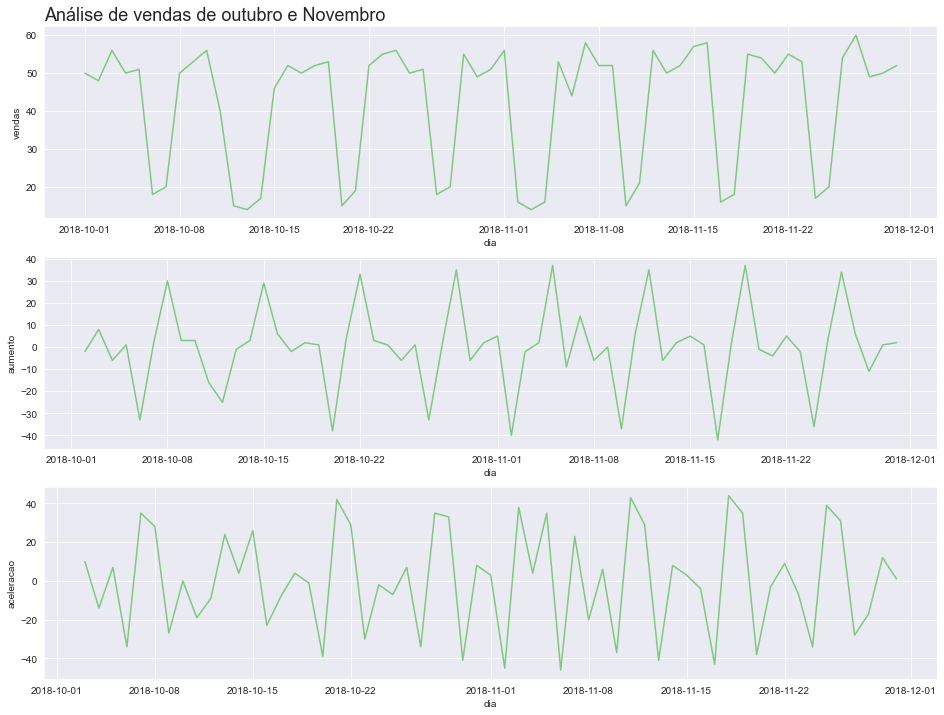

In [138]:
plot_comparacao('dia','vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de outubro e Novembro')

In [139]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [140]:
vendas_por_dia['dia_da_semana'].unique() 

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [141]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta',
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado', 'Sunday':'Domingo'}
dias_traduzidos

{'Monday': 'Segunda',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sabado',
 'Sunday': 'Domingo'}

In [142]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


In [144]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas.head()

<ipython-input-144-5bfc88bb2aa4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0


### Correlação das vendas diárias

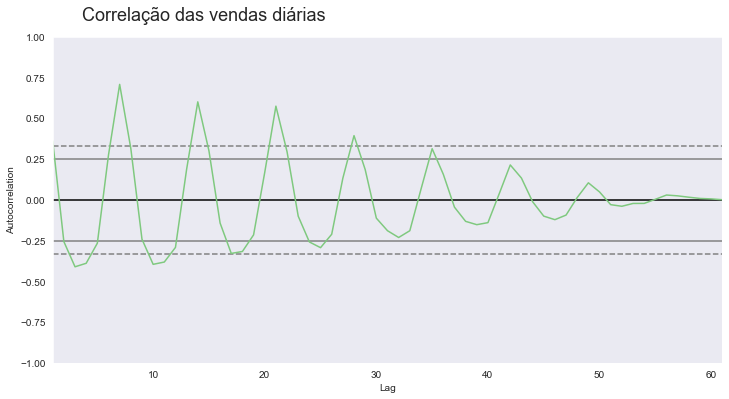

In [146]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

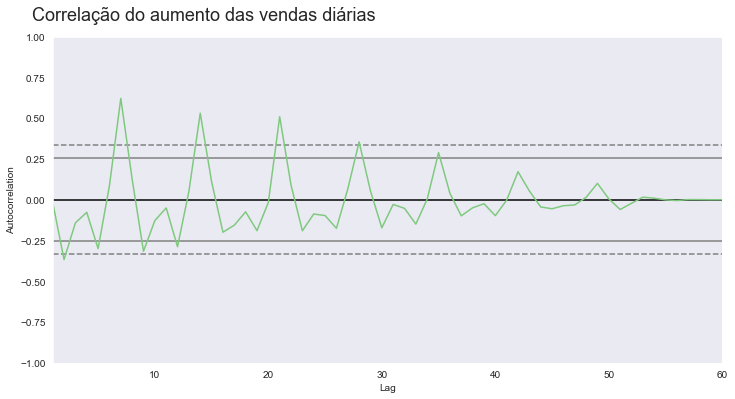

In [147]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

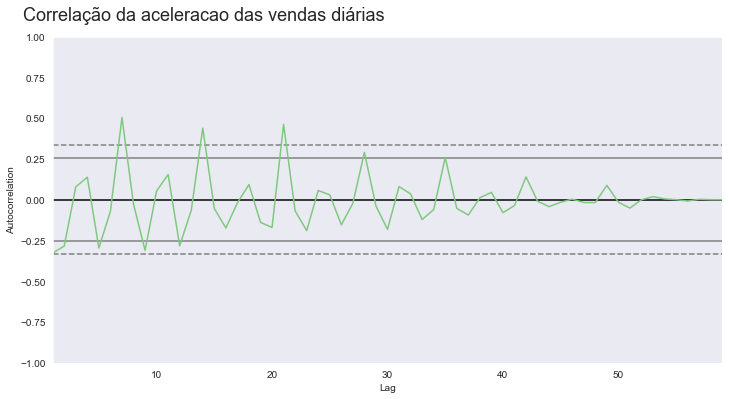

In [149]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Análise de vendas - Loja de café

In [150]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [151]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [152]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [155]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


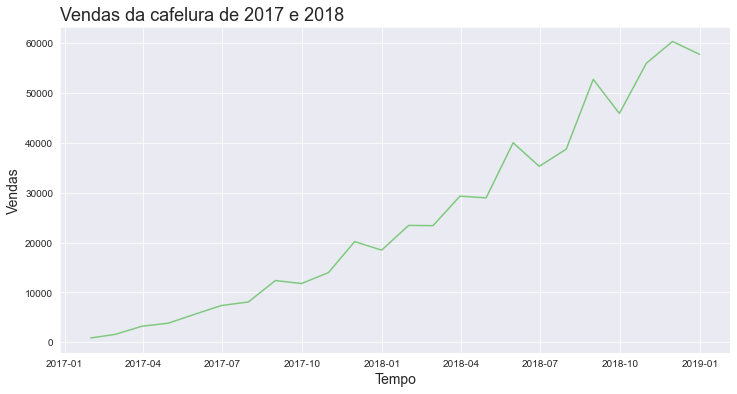

In [156]:
plotar('Vendas da cafelura de 2017 e 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

In [157]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [158]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [159]:
#normalizando vendas do dia útil
#fazemos a divisão das vendas pela quantidade dos dias de fim de semana
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


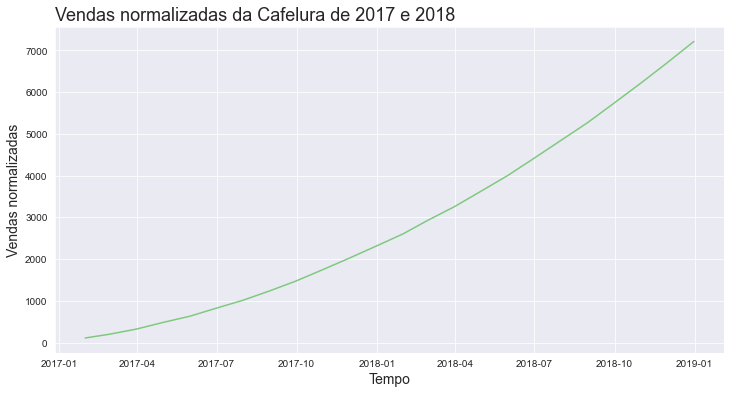

In [160]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018',
      'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

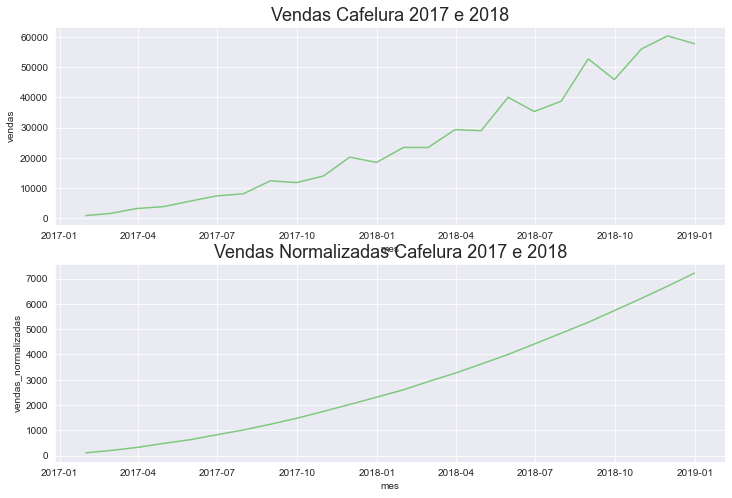

In [163]:
plt.figure(figsize=(12,8))
ax= plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data=cafelura)
ax=ax

### Statsmodels

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-168-9620acb81ab8>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resultado = seasonal_decompose(chocolura['vendas'], freq=3)


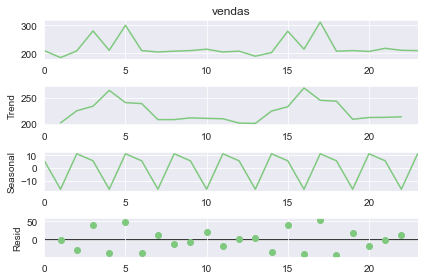

In [168]:
resultado = seasonal_decompose(chocolura['vendas'], freq=3)
ax = resultado.plot()

In [169]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [170]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


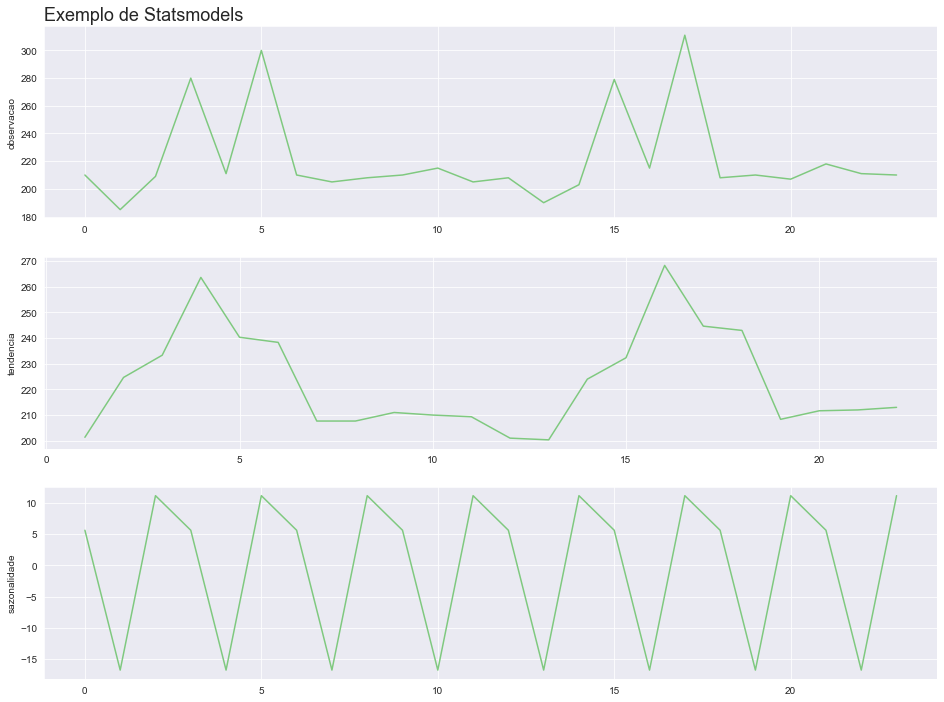

In [172]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')

# Empresa de telefonia - Análise de vendas

In [173]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [174]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [176]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [177]:
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [178]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


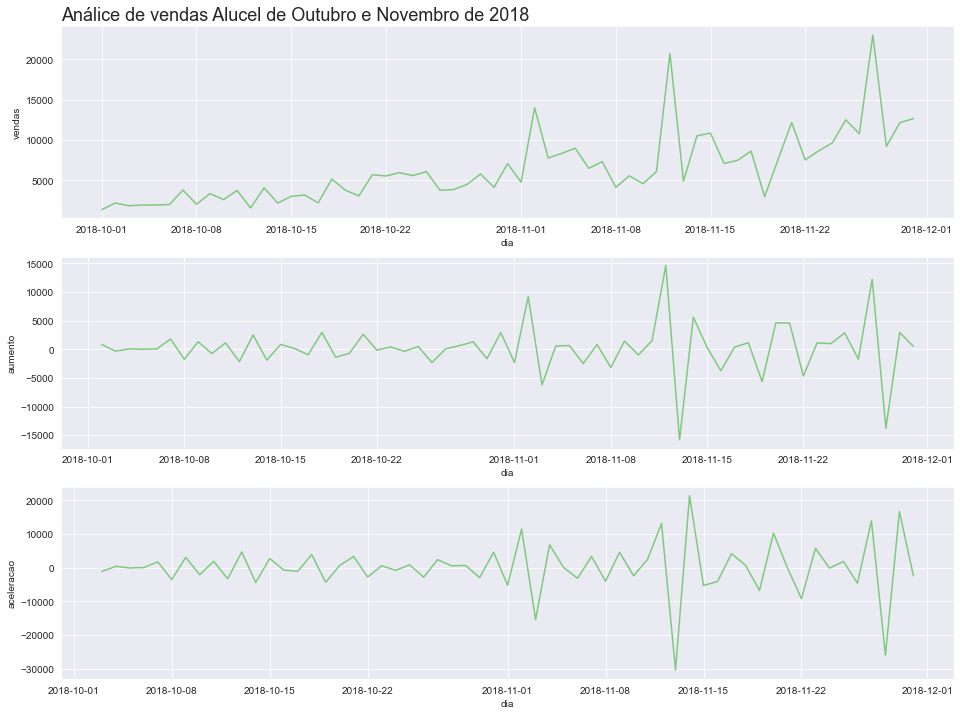

In [179]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
               alucel, 'Análice de vendas Alucel de Outubro e Novembro de 2018')

### Média móvel

In [184]:
#Aplicando média móvel (pega dois ou mais pontos e calcula a média)
#para minimizar os ruídos
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

In [186]:
alucel.head(21)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


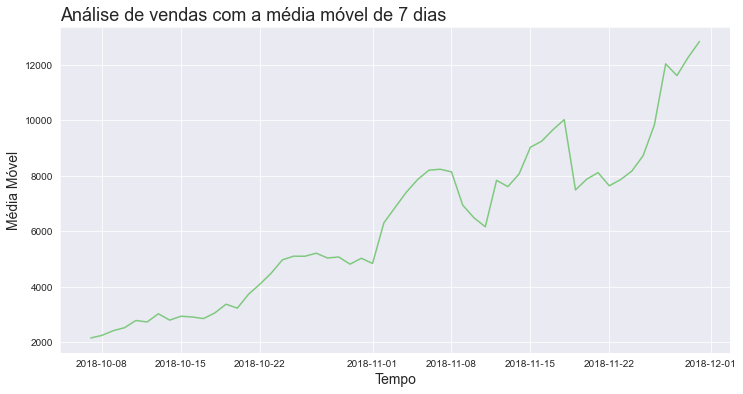

In [183]:
#comparando com gráfico das vendas sem a média móvel e com a média móvel
plotar('Análise de vendas com a média móvel de 7 dias',
      'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

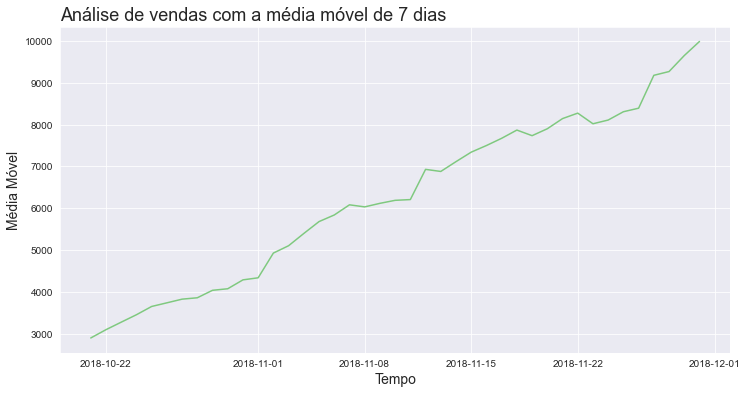

In [187]:
#plotando com média móvel de 21 dias
plotar('Análise de vendas com a média móvel de 7 dias',
      'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

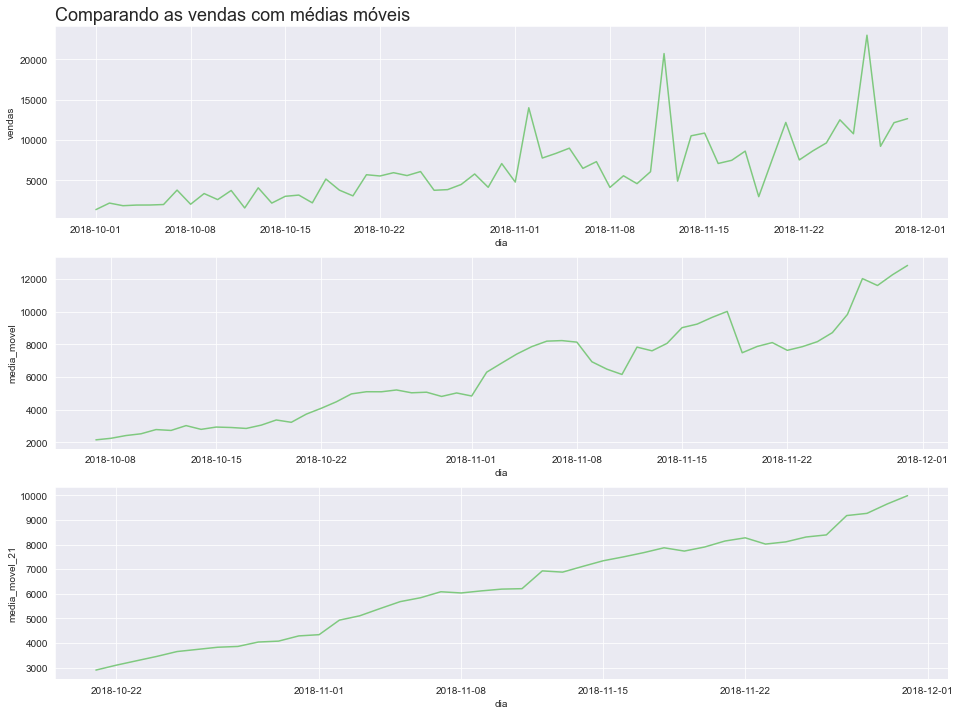

In [188]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
               alucel, 'Comparando as vendas com médias móveis')